In [1]:
import pandas as pd
data = pd.read_csv("Spotify.csv")
#data.head()
# data = data[['Weight','Length1','Length2','Length3', 'Height', 'Width']]
# data = pd.DataFrame(data)
data.head()

,danceability,energy,key,loudness,liveness,valence,tempo,duration_ms
0,0.754,0.449,7,-9.211,0.552,0.357,77.169,198973
1,0.740,0.613,8,-4.880,0.123,0.473,75.023,166606
2,0.587,0.535,5,-6.090,0.131,0.140,159.847,218147
3,0.739,0.559,8,-8.011,0.112,0.439,140.124,221440
4,0.835,0.626,1,-5.833,0.396,0.350,91.030,217925


In [2]:
import dcor
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['key'], 
                                                                        data['tempo'])))
print("p-value = {:.7f}".format(dcor.independence.distance_covariance_test(data['key'], 
                                                                           data['tempo'], 
                                                                           exponent=1.0, 
                                                                           num_resamples=2000)[0]))

distance correlation = 0.45
p-value = 0.7666167


In [3]:
def dist_corr(X, Y, pval=True, nruns=2000):
    """ Distance correlation with p-value from bootstrapping
    """
    dc = dcor.distance_correlation(X, Y)
    pv = dcor.independence.distance_covariance_test(X, Y, exponent=1.0, num_resamples=nruns)[0]
    if pval:
        return (dc, pv)
    else:
        return dc

In [4]:
def corrfunc(x, y, **kws):
    d, p = dist_corr(x,y) 
    #print("{:.4f}".format(d), "{:.4f}".format(p))
    if p > 0.1:
        pclr = 'Darkgray'
    else:
        pclr= 'Darkblue'
    ax = pyplot.gca()
    ax.annotate("DC = {:.2f}".format(d), xy=(.1, 0.99), xycoords=ax.transAxes, color = pclr, fontsize = 14)

In [5]:
# Create the distance method using distance_correlation
distcorr = lambda column1, column2: dcor.distance_correlation(column1, column2) 

# Apply the distance method pairwise to every column
rslt = data.apply(lambda col1: data.apply(lambda col2: distcorr(col1, col2)))

# check output
pd.options.display.float_format = '{:,.2f}'.format
rslt

,danceability,energy,key,loudness,liveness,valence,tempo,duration_ms
danceability,1.00,0.69,0.62,0.55,0.62,0.76,0.61,0.47
energy,0.69,1.00,0.44,0.88,0.52,0.82,0.52,0.52
key,0.62,0.44,1.00,0.42,0.66,0.49,0.45,0.47
loudness,0.55,0.88,0.42,1.00,0.49,0.75,0.42,0.51
liveness,0.62,0.52,0.66,0.49,1.00,0.42,0.54,0.44
valence,0.76,0.82,0.49,0.75,0.42,1.00,0.52,0.53
tempo,0.61,0.52,0.45,0.42,0.54,0.52,1.00,0.77
duration_ms,0.47,0.52,0.47,0.51,0.44,0.53,0.77,1.00


In [6]:
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['key'], data['danceability'])))
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['key'], data['energy'])))
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['key'], data['loudness'])))
print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['key'], data['liveness'])))
#print ("distance correlation = {:.2f}".format(dcor.distance_correlation(data['Production'], data['Random_2'])))

distance correlation = 0.62
distance correlation = 0.44
distance correlation = 0.42
distance correlation = 0.66


/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


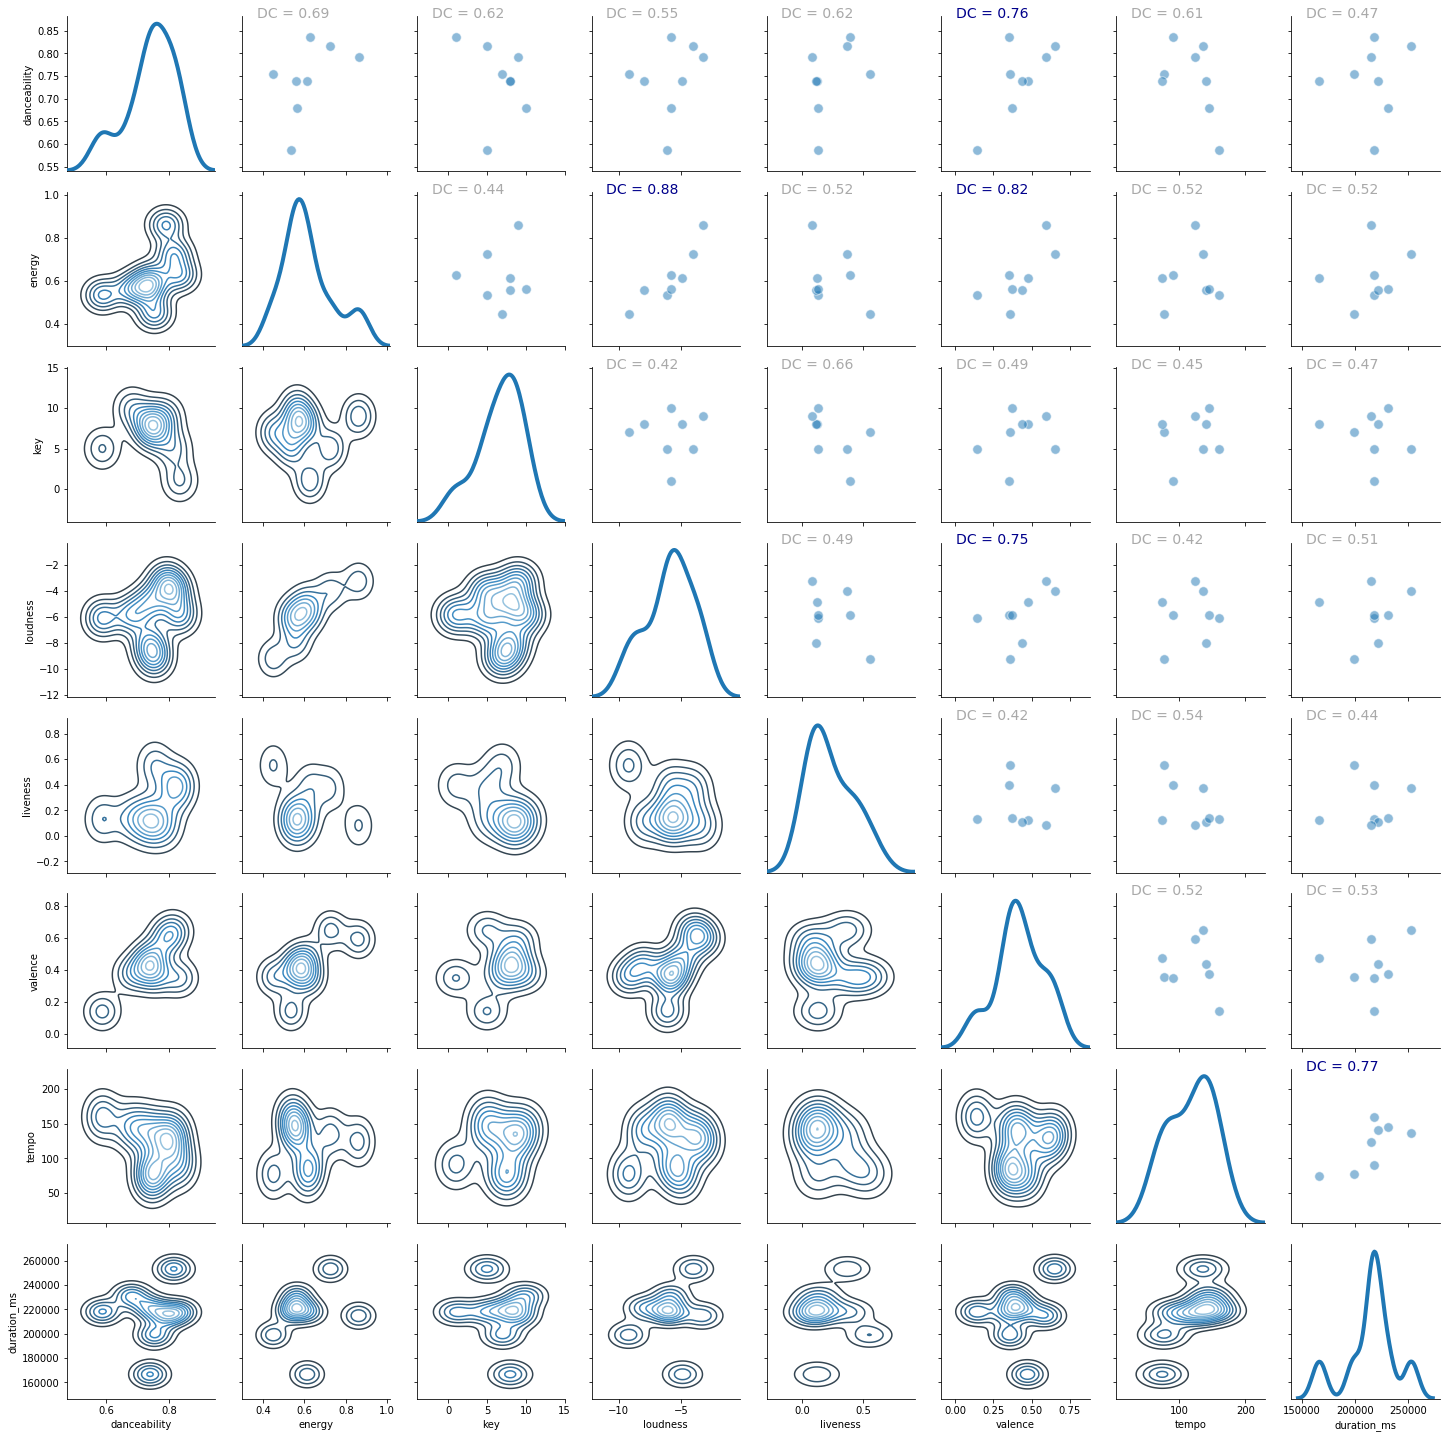

In [8]:
import seaborn as sns
from matplotlib import pyplot
g = sns.PairGrid(data, diag_sharey=False)
axes = g.axes
g.map_upper(pyplot.scatter, linewidths=1, edgecolor="w", s=90, alpha = 0.5)
g.map_upper(corrfunc)
g.map_diag(sns.kdeplot, lw = 4, legend=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
pyplot.show();

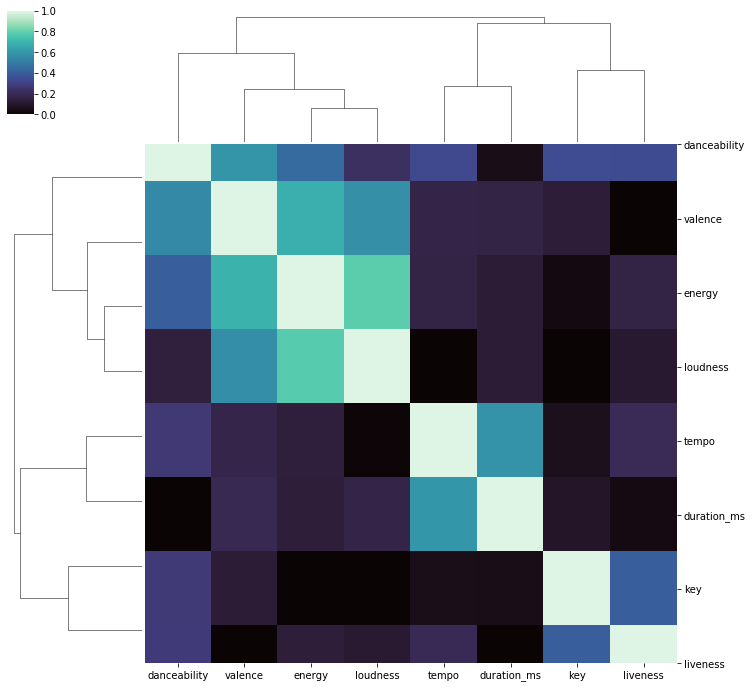

In [9]:
#data.rename(index=str, columns={"Gross_pay_transform": "Gross_pay_tr"}, inplace=True)
import seaborn as sns
from matplotlib import pyplot
distcorr = lambda column1, column2: dcor.distance_correlation(column1, column2)
rslt = data.apply(lambda col1: data.apply(lambda col2: distcorr(col1, col2)))

# h = heatmap.Heatmap(rslt)
# h.plot(vmin=0.0, vmax=1.1, cmap='cubehelix')
# fig = plt.gcf()
# fig.set_size_inches(22, 18)
# plt.gcf().get_axes()[1].invert_xaxis();

# # heatmap
# ax = sns.heatmap(rslt, linewidth=0.5)
# fig = pyplot.gcf()
# fig.set_size_inches(12, 8)
# pyplot.gcf().get_axes()[1].invert_xaxis();
# pyplot.show()

# heatmp + dendrogram
g = sns.clustermap(rslt, cmap="mako",  standard_scale =1)
fig = pyplot.gcf()
fig.set_size_inches(12, 12);

In [10]:
a = (g.dendrogram_col.reordered_ind)
a

[0, 5, 1, 3, 6, 7, 2, 4]

In [11]:
b = list(data)
b

['danceability',
 'energy',
 'key',
 'loudness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']

In [12]:
data = data[[b[i] for i in a]]
list(data)

['danceability',
 'valence',
 'energy',
 'loudness',
 'tempo',
 'duration_ms',
 'key',
 'liveness']

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


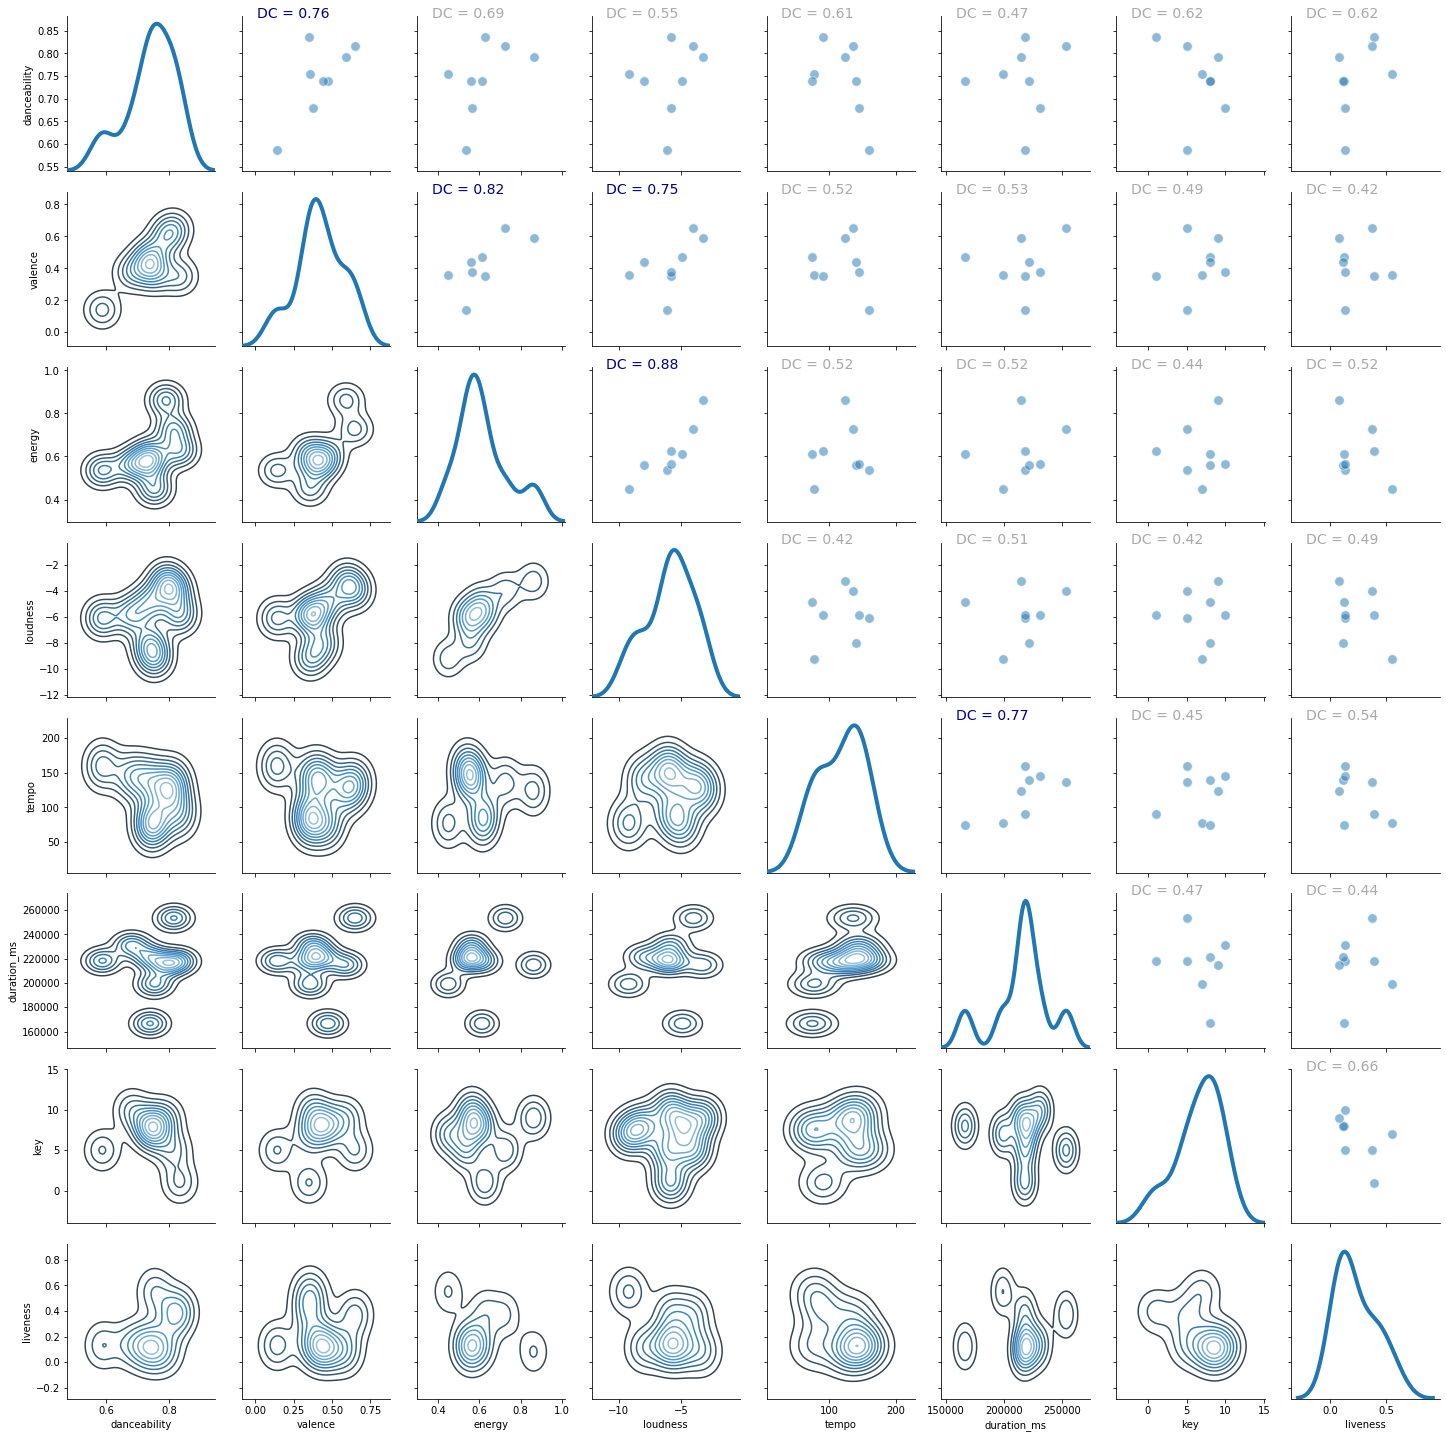

In [13]:
g = sns.PairGrid(data, diag_sharey=False)
axes = g.axes
g.map_upper(pyplot.scatter, linewidths=1, edgecolor="w", s=90, alpha = 0.5)
g.map_upper(corrfunc)
g.map_diag(sns.kdeplot, lw = 4, legend=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
pyplot.show()

In [14]:
import pymc3 as pm
with pm.Model() as glm_model:
    pm.glm.GLM.from_formula('key ~ liveness + tempo + energy + loudness + danceability',
                            data,
                            family=pm.glm.families.Normal())
    trace2 = pm.sample(1000, tune=1000, init='adapt_diag')

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, danceability, loudness, energy, tempo, liveness, Intercept]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:43<00:00, 52.75draws/s] 
/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
There were 152 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6522798907001416, but should be close to 0.8. Try to increase the number of tuning steps.
There were 717 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probab

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2e94d978>,
      dtype=object)

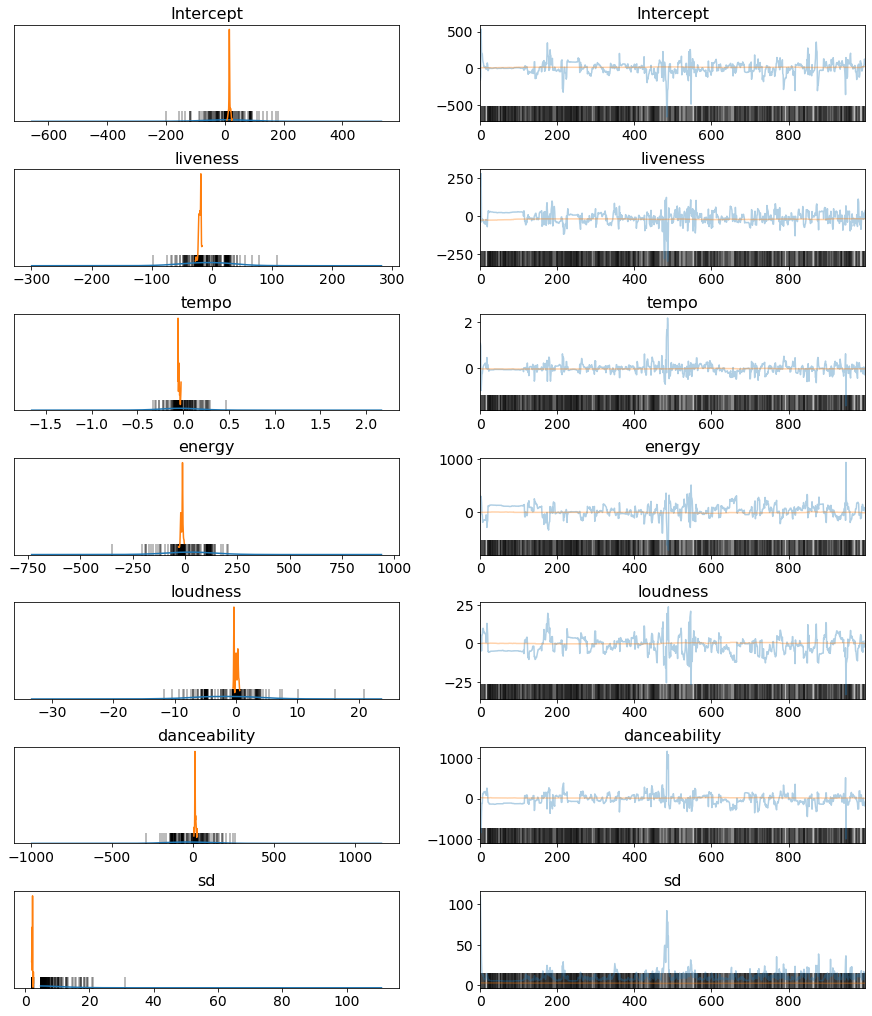

In [15]:
pm.traceplot(trace2)

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/pymc3/plots/__init__.py:40: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c2e5834a8>,
      dtype=object)

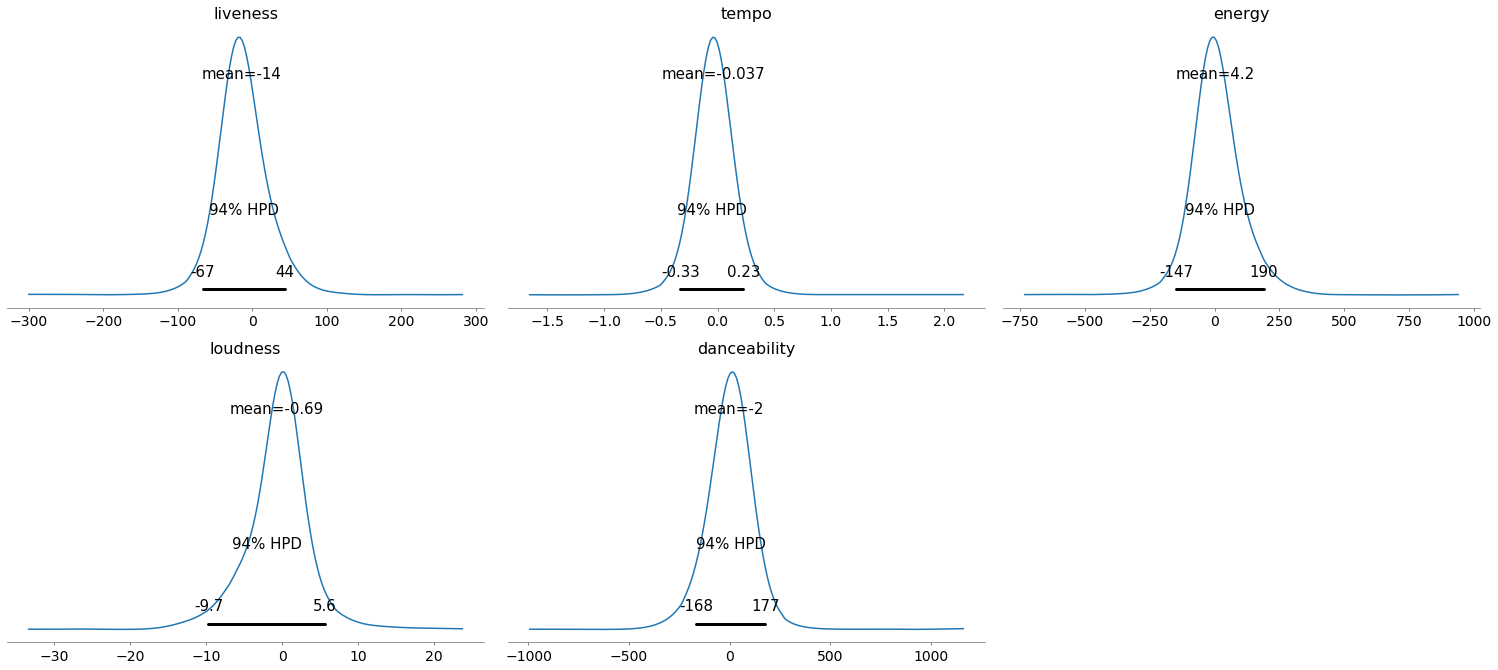

In [16]:
pm.plot_posterior(trace2, varnames=[ 'liveness', 'tempo', 'energy', 'loudness', 'danceability'])


In [17]:
import numpy as np
import scipy.stats as st

def confInt(r, nwells):
    z_crit = st.norm.ppf(.975)
    std_Z = 1/np.sqrt(nwells-3)      
    E = z_crit*std_Z
    Z_star = 0.5*(np.log((1+r)/(1.0000000000001-r)))
    ZCI_l = Z_star - E
    ZCI_u = Z_star + E
    RCI_l = (np.exp(2*ZCI_l)-1)/(np.exp(2*ZCI_l)+1) 
    RCI_u = (np.exp(2*ZCI_u)-1)/(np.exp(2*ZCI_u)+1)
    return RCI_u, RCI_l

In [18]:
from sklearn.ensemble import RandomForestRegressor #ML Algorithm (simplest one)
from sklearn import metrics
from sklearn.model_selection import train_test_split

/Users/ramesh0101/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [19]:
data.head()

,danceability,valence,energy,loudness,tempo,duration_ms,key,liveness
0,0.75,0.36,0.45,-9.21,77.17,198973,7,0.55
1,0.74,0.47,0.61,-4.88,75.02,166606,8,0.12
2,0.59,0.14,0.54,-6.09,159.85,218147,5,0.13
3,0.74,0.44,0.56,-8.01,140.12,221440,8,0.11
4,0.83,0.35,0.63,-5.83,91.03,217925,1,0.40


In [20]:
data.columns

Index(['danceability', 'valence', 'energy', 'loudness', 'tempo', 'duration_ms',
       'key', 'liveness'],
      dtype='object')

In [21]:
data_key = data[['key']]

In [22]:
data_key = np.asarray(data_key)
len(data_key)

8

In [23]:
y = data_key
y = np.asarray(data_key)
y = np.reshape(y,8)
y

array([ 7,  8,  5,  8,  1, 10,  5,  9])

In [24]:
data_liveness = data[['liveness']]
x = np.asarray(data_liveness)
x = np.reshape(x,8)
x = x.T
x

array([0.552 , 0.123 , 0.131 , 0.112 , 0.396 , 0.136 , 0.372 , 0.0814])

In [25]:
N = len(y)
N

8

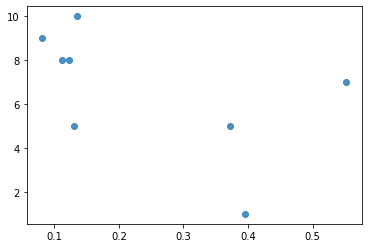

In [26]:
sns.regplot(x, y, fit_reg=False)

In [27]:
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel

kernel = ConstantKernel() + Matern(length_scale=2, nu=3/2) + WhiteKernel(noise_level=1)

In [28]:
X = x.reshape(-1, 1)
X.shape

(8, 1)

In [29]:
gp = gaussian_process.GaussianProcessRegressor(kernel=kernel)
gp.fit(X, y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 + Matern(length_scale=2, nu=1.5) + WhiteKernel(noise_level=1),
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [30]:
gp.kernel_

6.33**2 + Matern(length_scale=0.0938, nu=1.5) + WhiteKernel(noise_level=6.26)

In [31]:
x_pred = np.linspace(0, 20).reshape(-1,1)
y_pred, sigma = gp.predict(x_pred, return_std=True)

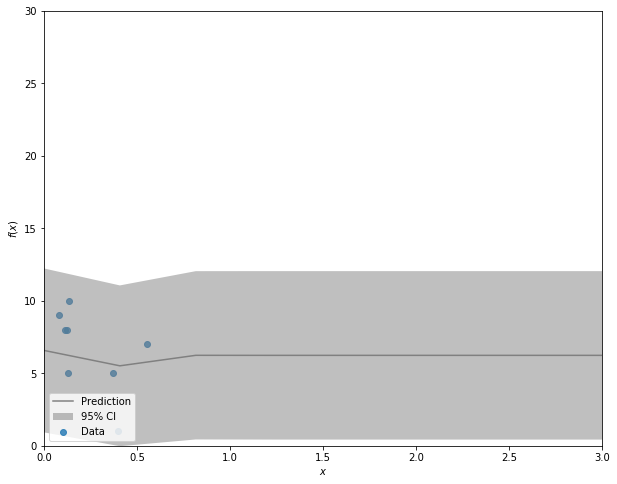

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.regplot(x, y, fit_reg=False, label='Data')
plt.plot(x_pred, y_pred, color='grey', label='Prediction')
plt.fill(np.concatenate([x_pred, x_pred[::-1]]),
         np.concatenate([y_pred - 2*sigma,
                        (y_pred + 2*sigma)[::-1]]),
         alpha=.5, fc='grey', ec='None', label='95% CI')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.xlim(0,3)
plt.ylim(0, 30)
plt.legend(loc='lower left');